# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the data
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [4]:
df.shape

(1898, 9)

#### Observations:
There are a total of 1898 rows and 9 attribute columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
Within the data frame we have **four** 64-bit integer datatypes, **four** object datatypes, and **one** 64-bit float datatype.

**64-bit integer**:
order_id, customer_id, food_preparation_time, delivery time

**Object**:
restaurant_name, cuisine_type, days_of_the_week, rating

**64-bit float**:
cost_of_the_order

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [6]:
missing_values = df.isnull().sum()

print("Missing values in each column:")
missing_values

Missing values in each column:


,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
The dataframe seems to not be missing any values, thus we don't to change any of the dataframe's values.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [7]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
The minimum time it takes to food to prepare is 20 minutes.

The maximum time it takes to food to prepare is 35 minutes.

The averge time it takes to food to prepare is 27 minutes.

### **Question 5:** How many orders are not rated?

In [8]:
not_rated_count = df[df['rating'] == 'Not given'].shape[0]
print(f"The number of orders not rated is: {not_rated_count}")

The number of orders not rated is: 736


#### Observations:
The number of orders not rated is 736.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

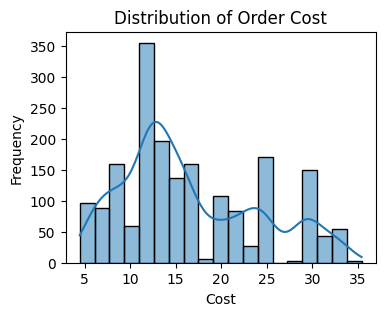

In [9]:
# Explore the distribution of 'cost_of_the_order'
plt.figure(figsize=(4, 3))
sns.histplot(df['cost_of_the_order'], kde=True)
plt.title('Distribution of Order Cost')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()

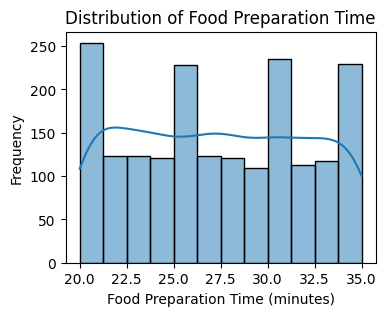

In [11]:
# Explore the distribution of 'food_preparation_time'
plt.figure(figsize=(4, 3))
sns.histplot(df['food_preparation_time'], kde=True)
plt.title('Distribution of Food Preparation Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Frequency')
plt.show()

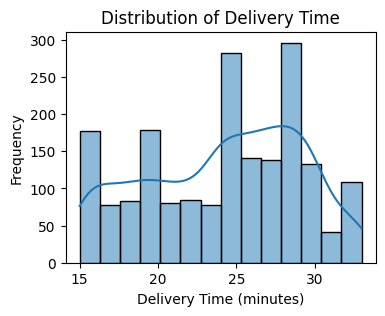

In [12]:
# Explore the distribution of 'delivery_time'
plt.figure(figsize=(4, 3))
sns.histplot(df['delivery_time'], kde=True)
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.show()

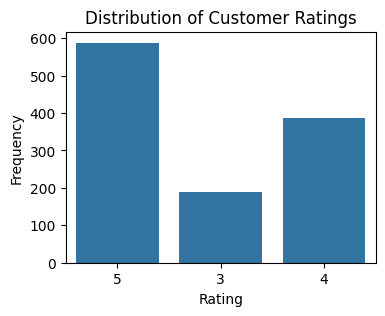

In [13]:
# Explore the distribution of 'rating' (excluding 'Not given')
plt.figure(figsize=(4, 3))
sns.countplot(x='rating', data=df[df['rating'] != 'Not given'])
plt.title('Distribution of Customer Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

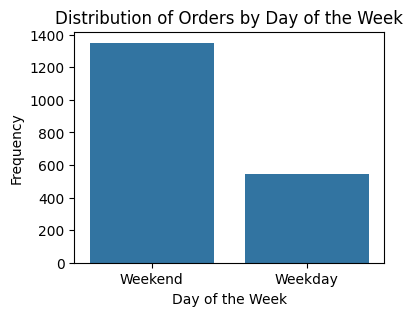

In [14]:
# Explore the distribution of 'day_of_the_week'
plt.figure(figsize=(4, 3))
sns.countplot(x='day_of_the_week', data=df)
plt.title('Distribution of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.show()

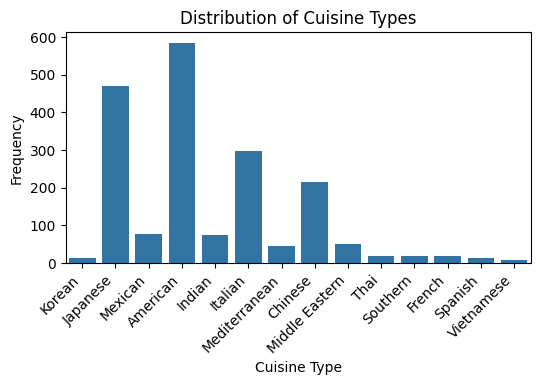

In [15]:
# Explore the distribution of 'cuisine_type'
plt.figure(figsize=(6, 3))
sns.countplot(x='cuisine_type', data=df)
plt.title('Distribution of Cuisine Types')
plt.xlabel('Cuisine Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

####Observations:

- **Cost**: The distribution of order cost seems to be somewhat right-skewed, with a majority of orders falling within a specific price range of 7-17 dollars.
- **Food Preparation Time**: The food preparation time generally seems to follow a normal distribution with frequency of times to prepare an order being spread out.
- **Delivery Time**: The delivery time also appears to follow a normal distribution, indicating that delivery time is generally consistent.
- **Rating**: The customer ratings show a tendency towards higher ratings with majority of customers giving 4 or 5 rating.
- **Day of the Week**: Orders are more frequently placed on Weekdays than Weekends.
- **Cuisine Type**: American, Japanese, Italian and Chinese cuisines are more popular.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [21]:
df.groupby('restaurant_name')['order_id'].count().sort_values(ascending=False).head(5)

,order_id
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:

The top 5 restaurants by orders received are

1. Shake Shack: 219
2. The Meatball Shop: 132
3. Blue Ribbon Sushi: 119
4. Blue Ribbon Fried Chicken: 96
5. Parm: 68


### **Question 8**: Which is the most popular cuisine on weekends?

In [20]:
df[df['day_of_the_week'] == 'Weekend'].groupby('cuisine_type')['order_id'].count().sort_values(ascending=False).head(1)

,order_id
cuisine_type,
American,415


#### Observations:

The most popular cuisine on weekends is American cuisine.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [19]:
order_costs_more_than_20 = df[df['cost_of_the_order'] > 20].shape[0]
total_orders = df.shape[0]
percentage_more_than_20 = (order_costs_more_than_20 / total_orders) * 100
print(f"The percentage of orders that cost more than $20 is: {percentage_more_than_20:.2f}%")

The percentage of orders that cost more than $20 is: 29.24%


#### Observations:
The percentage of orders that cost more than 20 dollars is 29.24%.

### **Question 10**: What is the mean order delivery time?

In [18]:
df['delivery_time'].mean()

24.161749209694417

#### Observations:

The mean order delivery time is 24 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [31]:
df.groupby('customer_id')['order_id'].count().sort_values(ascending=False).head(3)

,order_id
customer_id,
52832,13
47440,10
83287,9


#### Observations:
The top 3 customers and the number of orders they placed are:

1. 52832: 13 orders placed
2. 47440: 10 orders placed
3. 83287: 9 orders placed

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

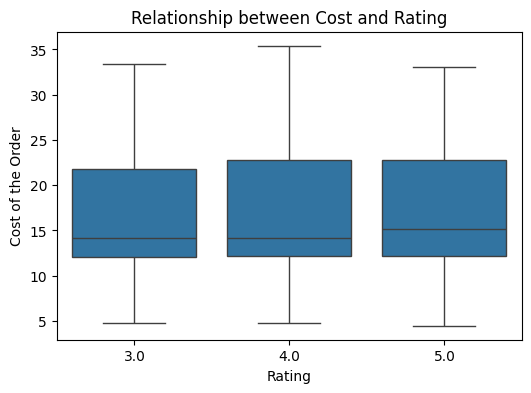

In [21]:
# Explore the relationship between cost and rating
plt.figure(figsize=(6, 4))
sns.boxplot(x='rating', y='cost_of_the_order', data=df[df['rating'] != 'Not given'])
plt.title('Relationship between Cost and Rating')
plt.xlabel('Rating')
plt.ylabel('Cost of the Order')
plt.show()



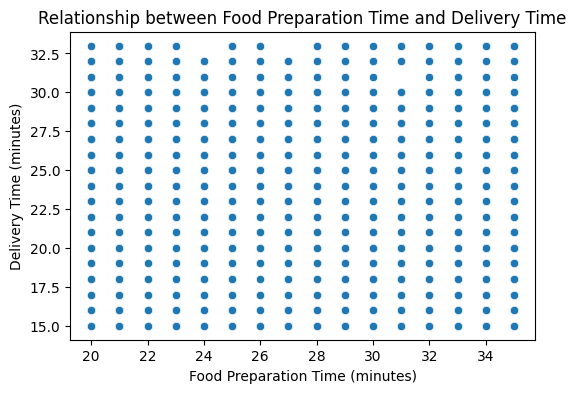

In [20]:
# Explore the relationship between food preparation time and delivery time
plt.figure(figsize=(6, 4))
sns.scatterplot(x='food_preparation_time', y='delivery_time', data=df)
plt.title('Relationship between Food Preparation Time and Delivery Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Delivery Time (minutes)')
plt.show()

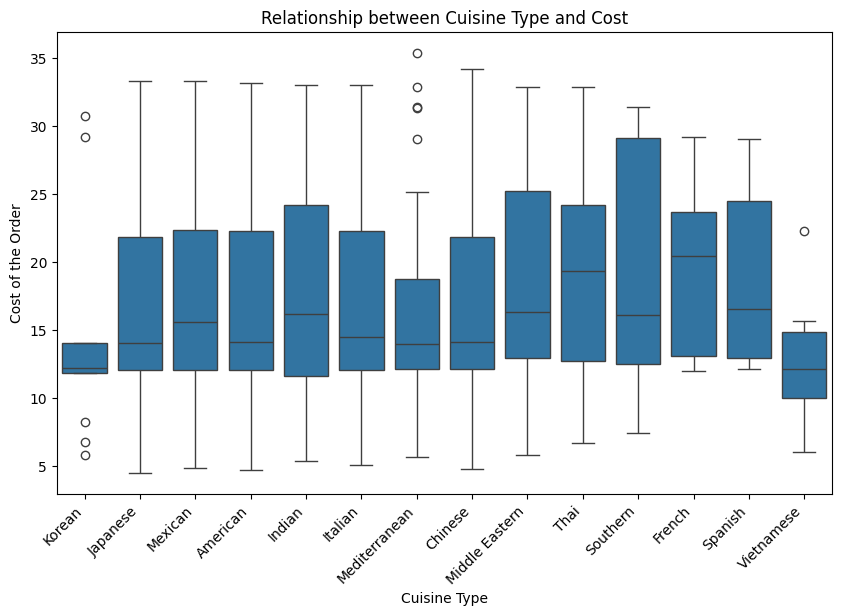

In [19]:
# Explore the relationship between cuisine type and cost
plt.figure(figsize=(10, 6))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.title('Relationship between Cuisine Type and Cost')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of the Order')
plt.xticks(rotation=45, ha='right')
plt.show()


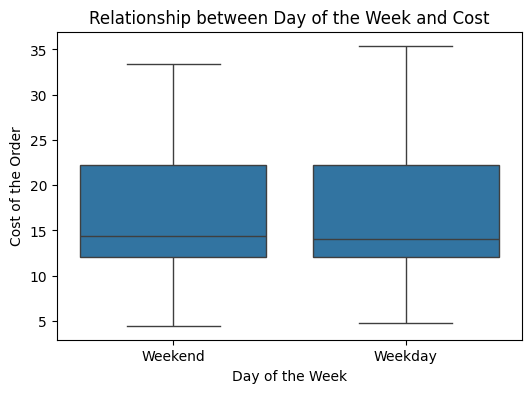

In [18]:
# Explore the relationship between day of the week and cost
plt.figure(figsize=(6, 4))
sns.boxplot(x='day_of_the_week', y='cost_of_the_order', data=df)
plt.title('Relationship between Day of the Week and Cost')
plt.xlabel('Day of the Week')
plt.ylabel('Cost of the Order')
plt.show()

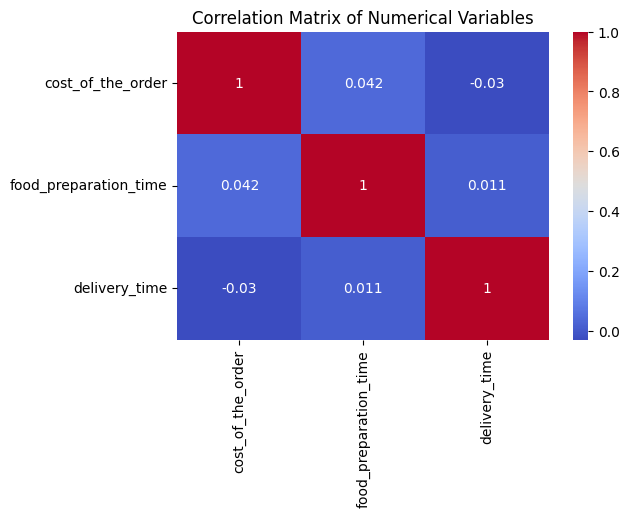

In [17]:
# Calculate the correlation matrix for numerical variables
correlation_matrix = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

####Observations:

- **Cost and Rating Relationship**: A slight trend suggests that higher ratings may be associated with a slightly higher cost range, but the relationship doesn't seem strongly significant.

- **Food Preparation Time and Delivery Time Relationship**: There isn't a strong correlation between food preparation and delivery time, indicating that preparation time doesn't heavily influence delivery time.

- **Cuisine Type and Cost**: Certain cuisine types tend to have different cost ranges, likely due to ingredient costs or preparation complexity.

- **Day of the Week and Cost**: There is no clear pattern in cost variation between weekdays and weekends, suggesting costs remain stable regardless of the day.

- **Correlation of Numerical Variables**: The correlation matrix indicates a weak positive relationship between order cost and food preparation time, suggesting that higher-cost orders might take longer to prepare. There is also a weak correlation between order cost and delivery time, which could be due to longer distances for more expensive orders.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [23]:
df_relevant = df[['restaurant_name', 'rating']].copy()
df_relevant = df_relevant[df_relevant['rating'] != 'Not given']
df_relevant['rating'] = pd.to_numeric(df_relevant['rating'])
restaurant_ratings = df_relevant.groupby('restaurant_name').agg({'rating': ['count', 'mean']})
restaurant_ratings.columns = ['rating_count', 'average_rating']
promotional_restaurants = restaurant_ratings[(restaurant_ratings['rating_count'] > 50) & (restaurant_ratings['average_rating'] > 4)]

promotional_restaurants

,rating_count,average_rating
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.328125
Blue Ribbon Sushi,73,4.219178
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905


#### Observations:

Restaurants that fulfill the criteria of more than 50 ratings and and average rating greater than 4 are:

- Blue Ribbon Fried Chicken
- Blue Ribbon Sushi
- Shake Shack
- The Meatball Shop

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [25]:
def calculate_net_revenue(df):
  total_revenue = 0
  for _, row in df.iterrows():
    cost = row['cost_of_the_order']
    if cost > 20:
      total_revenue += cost * 0.25
    elif cost > 5:
      total_revenue += cost * 0.15

  return total_revenue


net_revenue = calculate_net_revenue(df)
print(f"The net revenue generated by the company is: ${net_revenue:.2f}")

The net revenue generated by the company is: $6166.30


#### Observations:

The company's net revenue based on their charges across all orders would be $6166.30.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [26]:
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']
orders_more_than_60_minutes = df[df['total_delivery_time'] > 60].shape[0]
total_orders = df.shape[0]
percentage_more_than_60_minutes = (orders_more_than_60_minutes / total_orders) * 100

print(
    f"The percentage of orders that take more than 60 minutes to deliver is: {percentage_more_than_60_minutes:.2f}%"
)

The percentage of orders that take more than 60 minutes to deliver is: 10.54%


#### Observations:

There percentage of orders that take more that 60 minutes to be prepared and delivered is 10.54%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [29]:
df.groupby('day_of_the_week')['delivery_time'].mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:

Weekday delivery time tends to average a greater delivery time than weekend delivery time with weekday average delivery time amounting to about 28 minutes and weekday average delivery time amounting to about 22 minutes and 30 seconds.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:

- Most orders fall in the $7-$17 range, showing affordability, with some higher-priced items attracting fewer customers.

- Preparation and delivery times are consistent, with no strong link between them, suggesting they operate independently.

- High customer satisfaction is evident with most ratings at 4 or 5 stars.
More orders are placed on weekdays, suggesting higher demand during the workweek.

- American, Japanese, Italian, and Chinese cuisines are the favorites, indicating a focus on these dishes while considering trying other options.

- Higher-cost orders tend to get slightly better ratings, but cost doesn’t strongly impact satisfaction.

- Costs are steady across weekdays and weekends, showing consistent pricing strategies.

- There’s a weak link between higher costs and longer prep or delivery times, possibly due to complex dishes or longer distances.

### Recommendations:

- Maintain quality in the 7-17 dollar range while offering options for higher spending. Use promotions to attract higher-paying customers.

- Streamline kitchen operations for high-cost items to reduce prep time.
Leverage higher weekday order volumes with weekday promotions. Introduce weekend deals to boost sales.

- Focus on popular cuisines while experimenting with limited-time offers for less common cuisines to test demand.

- Keep high standards for mid-to-high-priced items. Collect feedback to improve customer satisfaction.

- Optimize delivery routes, especially for high-cost orders that take longer to deliver.

- Keep consistent pricing but explore time-based promotions to balance weekday and weekend sales.

---